### 1. Import and data loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,white_castled,...,white_pawn_moves,black_pawn_moves,white_piece_moves,black_piece_moves,white_center_pawns,black_center_pawns,white_bishop_developed,black_bishop_developed,white_early_queen_out,black_early_queen_out
0,2504,2371,2,0,133,2437.5,1,133,0,1,...,5,5,4,4,2,2,1,1,0,0
1,2487,2596,1,0,109,2541.5,0,-109,0,1,...,4,6,5,3,2,1,1,1,0,0
2,2915,2921,1,0,6,2918.0,0,-6,0,1,...,4,5,5,4,2,1,1,1,0,0
3,2542,2433,2,0,109,2487.5,1,109,10,1,...,2,5,7,5,2,1,1,1,0,0
4,2473,2658,0,0,185,2565.5,0,-185,0,1,...,2,3,7,6,2,1,1,1,0,0


### 2. Prepare data

In [3]:
X = df.drop('ResultNumeric', axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (3243955, 22)
Target: (3243955,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,                # Use all CPU cores
)

In [6]:
start_time = time.time()

rf_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 190.74 seconds (3.18 minutes)


### 5. Evaluate

In [7]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.5842 (58.42%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.56      0.58      0.57    265868
        Draw       0.88      0.27      0.42     83919
   White Win       0.59      0.68      0.63    299004

    accuracy                           0.58    648791
   macro avg       0.67      0.51      0.54    648791
weighted avg       0.61      0.58      0.58    648791



### 6. Confusion Matrix

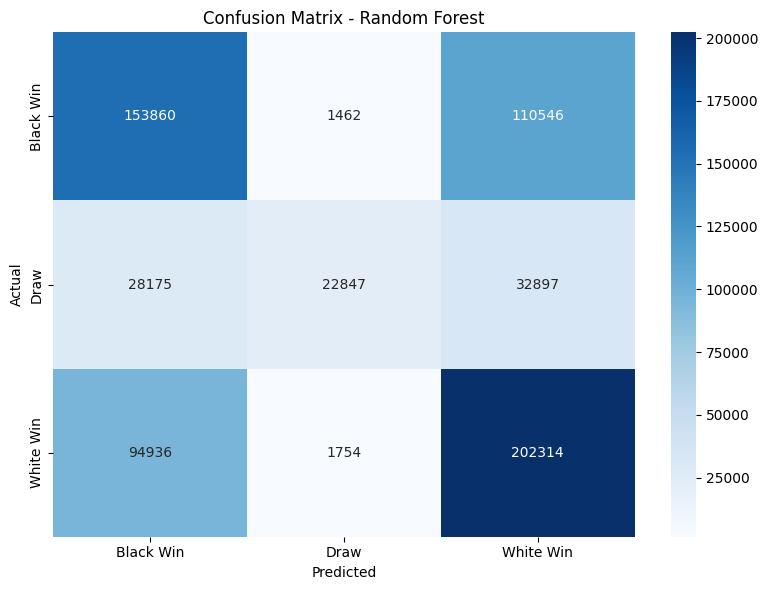

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

### 7. Feature Importance

                   Feature  Importance
6     WhiteRatingAdvantage    0.185712
1                 BlackElo    0.171992
4                AvgRating    0.165470
0                 WhiteElo    0.121951
5       WhiteIsHigherRated    0.114528
3               RatingDiff    0.087043
2              EventTypeID    0.024933
7                    ECOID    0.016962
13        black_pawn_moves    0.013684
15       black_piece_moves    0.013073
12        white_pawn_moves    0.012150
14       white_piece_moves    0.011899
16      white_center_pawns    0.011226
17      black_center_pawns    0.010448
11          black_captures    0.009872
10          white_captures    0.009393
8            white_castled    0.005097
9            black_castled    0.004891
21   black_early_queen_out    0.003111
20   white_early_queen_out    0.002539
19  black_bishop_developed    0.002152
18  white_bishop_developed    0.001874


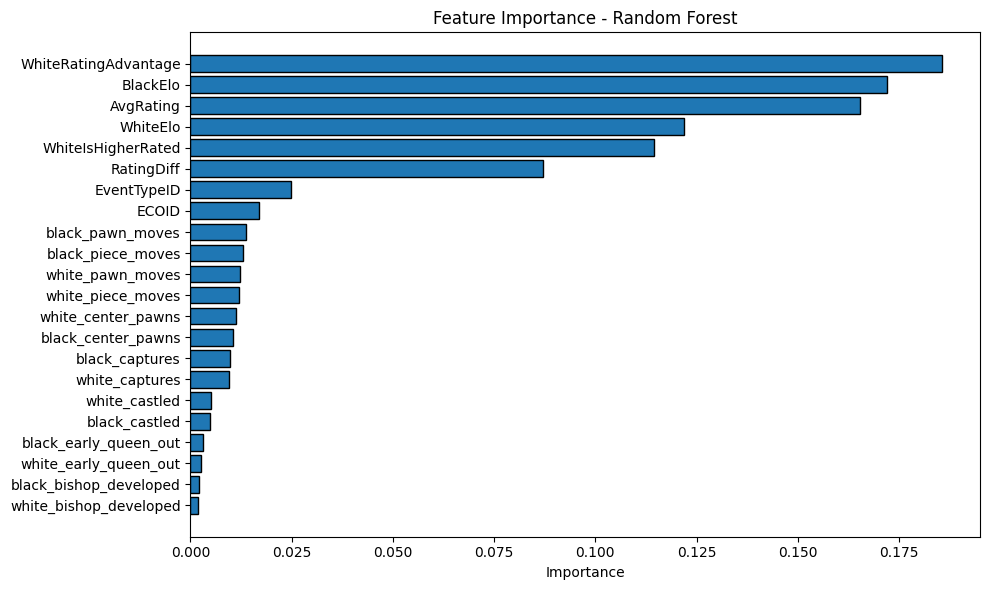

In [9]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], edgecolor="black")
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()